In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
MR = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [ ]:
MR.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
MR.shape

(15509, 10)

In [ ]:
MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
MR.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Mamta,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
MR.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
MR_clean = MR.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1'])
print("After Dropping Nulls:", MR_clean.shape)

After Dropping Nulls: (7707, 10)


In [ ]:
X = MR_clean[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = MR_clean['Rating'].astype(float)

In [ ]:
categorical_cols = X.columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"\n✅ Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


✅ Model Performance:
RMSE: 1.26
R2 Score: 0.17


The model achieved an **RMSE of 1.26,** meaning the typical prediction error is around **1.26rating** points.
However, the **R²** score of **0.17** indicates the model explains only **17%** of the variance in movie ratings, suggesting there’s room for improvement with better features or data.

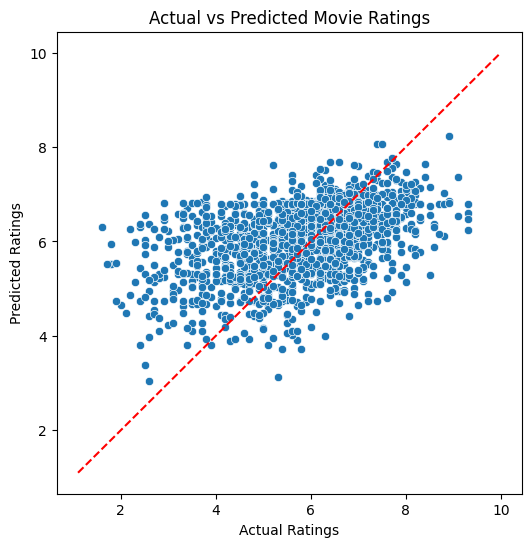

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

The scatter plot shows the relationship between **actual ratings** (X-axis) and predicted ratings (Y-axis). The **red dashed line** represents perfect predictions, but most points are scattered around it, especially in the mid-range ratings. This indicates the model tends to predict average ratings, struggling with very high or low ratings, which aligns with the low **R² score**.